<style>
/* --- 0. CONTAINER FIX --- */
body {
    overflow-x: hidden !important;
}
div#notebook-container, .container {
    width: 100% !important;
    max-width: 100% !important;
    min-width: 0 !important;
}

/* --- 1. HIDE PROMPTS --- */
.prompt, 
.input_prompt, 
.output_prompt, 
.jp-InputPrompt {
    display: none !important;
}

/* --- 2. FLAT INPUT/OUTPUT --- */
.jp-CodeCell,
.jp-InputArea-editor,
div.input_area,
.jp-OutputArea-output,
.output_subarea,
.output_wrapper,
.jp-RenderedText,
.jp-RenderedHTMLCommon pre {
    background-color: transparent !important;
    border: none !important;
    border-radius: 0 !important;
    margin: 0 !important;
    color: #000000 !important;
}

/* --- 2a. Code inside code cells --- */
div.input_area pre,
.jp-InputArea-editor pre,
.code_cell pre {
    background-color: transparent !important;
    border: none !important;
    color: #000000 !important;
    padding-left: 10px !important;  /* input offset */
}

/* --- 2b. Markdown code blocks --- */
div.text_cell pre code, 
div.text_cell pre {
    background-color: #f7f7f7 !important;
    padding: 6px 10px;
    border-radius: 4px;
    border: 1px solid #ccc !important;
    max-width: 100%;
    color: #000000 !important;
}

/* --- 2c. Warnings / stderr / FutureWarnings --- */
.jp-OutputArea-output[data-mime-type="application/vnd.jupyter.stderr"],
.output_stderr,
.output_error,
.output_stderr pre,
.output_error pre,
.output_stderr span,
.output_error span,
.jp-RenderedText[data-mime-type="application/vnd.jupyter.stderr"] * {
    background-color: transparent !important;
    color: #000000 !important;
    border: none !important;
    border-radius: 0 !important;
    padding: 0 !important;
    margin: 0 !important;
    font-style: normal !important;
}

/* --- 3. MOBILE OVERRIDE --- */
@media screen and (max-width: 480px) {
    div.input_area pre,
    .jp-InputArea-editor pre,
    .code_cell pre,
    div.text_cell pre {
        white-space: pre-wrap !important;
        word-wrap: break-word !important;
        overflow-x: hidden !important;
        padding-left: 10px !important;
    }

    .output_subarea,
    .output_wrapper,
    .output_html,
    .output_area table,
    .output_area table * {
        overflow-x: auto !important;
        width: auto !important;
        min-width: 100% !important;
    }

    .output_area table {
        display: block !important;
        min-width: 100%;
    }

    .output_area table td, .output_area table th {
        white-space: nowrap !important;
    }
}

/* --- 4. SCROLLBAR STYLING --- */
/* For modern browsers (Chrome, Edge, Safari) */
::-webkit-scrollbar {
    width: 10px;
    height: 10px;
}

::-webkit-scrollbar-track {
    background: #f0f0f0;  /* light track */
    border-radius: 5px;
}

::-webkit-scrollbar-thumb {
    background: #c0c0c0;  /* slightly darker thumb */
    border-radius: 5px;
}

::-webkit-scrollbar-thumb:hover {
    background: #a0a0a0;  /* darker on hover */
}

/* Firefox scrollbar */
* {
    scrollbar-width: thin;
    scrollbar-color: #c0c0c0 #f0f0f0;  /* thumb, track */
}

/* --- 5. Neutralize plain text outputs (like <xarray.plot.facetgrid.FacetGrid ...>) --- */
.output_subarea pre,
.jp-RenderedText pre,
.output_text pre {
    background-color: transparent !important;
    color: #000000 !important;
    border: none !important;
    box-shadow: none !important;
}

</style>


[Imtiaj.](https://imtiajiqbalmahfuj.github.io/index.html#top)

# 🌧️ Precipitation Mapping of Bangladesh (2015–2016)
### Mapping Annual Rainfall Patterns using GEE (Python API) and PERSIANN-CDR Dataset  

![Project Preview](https://raw.githubusercontent.com/imtiajiqbalmahfuj/imtiajiqbal-portfolio/refs/heads/main/Projects/25026_Precipitation_of_Bangladesh_GEE/Precipitation%20of%20Bangladesh%202015-16%20with%20GEE%20(Python).png)  

![Date](https://img.shields.io/badge/03/11/2025-04/11/2025-blue)
![Location](https://img.shields.io/badge/Location-Bangladesh-purple)
![Platform](https://img.shields.io/badge/Platform-Google%20Earth%20Engine-green)
---
> **Author:** Imtiaj Iqbal Mahfuj  
---

## 📝 Overview
Bangladesh, a riverine country highly influenced by monsoon rainfall, experiences significant spatial and temporal variations in precipitation. Understanding these variations is crucial for **flood risk management, agricultural planning, and climate adaptation**.

This project visualizes **precipitation distribution across Bangladesh during 2015–2016** using the **PERSIANN-CDR dataset** — a satellite-based precipitation product integrating **infrared observations** and **artificial neural networks**.  
Using **Google Earth Engine’s Python API**, I extracted, processed, and visualized spatial rainfall intensity to identify areas with **higher rainfall concentration** and **potential hydrological impacts**.

The map highlights the heavy rainfall zones in **Sylhet, Chattogram, and Cox’s Bazar**, which often correlate with flash flood-prone areas, while **northwestern regions** show relatively lower precipitation intensity.

---

## 🛠️ Tools & Technologies
![Python](https://img.shields.io/badge/Python-3.10-blue)
![GEE](https://img.shields.io/badge/Google%20Earth%20Engine-Python%20API-green)
![Remote Sensing](https://img.shields.io/badge/Remote%20Sensing-PERSIANN--CDR-orange)

---

## ⚙️ Methodology
| Step | Description |
|------|-------------|
| **1. Data Collection** | The **PERSIANN-CDR dataset** was accessed from NOAA’s Climate Data Record via Google Earth Engine (`NOAA/CDR/PERSIANN-CDR`). It provides global daily precipitation data from 1983–present. |
| **2. Preprocessing** | The dataset was clipped to the **Bangladesh boundary**. Timeframe filtered for 2015–2016. Units converted and scaled appropriately. |
| **3. Analysis** | Calculated total precipitation and generated yearly mean composites to visualize inter-annual variability. |
| **4. Visualization** | Used **Google Earth Engine (Python API)** to display spatial distribution and exported the results for further refinement in Python using **Matplotlib**. |

---
## Codes                                                                                                                

In [2]:
import ee
import geemap
import xarray as xr
# import xee
import matplotlib.pyplot as plt

In [3]:
ee.Authenticate()
ee.Initialize()

In [4]:
Map = geemap.Map(basemap = 'SATELLITE')
Map

Map(center=[0, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], position='topright', transp…

In [21]:
roi = Map.draw_last_feature.geometry()

In [22]:
roi

ee.Geometry({
  "functionInvocationValue": {
    "functionName": "Feature.geometry",
    "arguments": {
      "feature": {
        "functionInvocationValue": {
          "functionName": "Feature",
          "arguments": {
            "geometry": {
              "functionInvocationValue": {
                "functionName": "GeometryConstructors.Polygon",
                "arguments": {
                  "coordinates": {
                    "constantValue": [
                      [
                        [
                          86.989746,
                          20.078182
                        ],
                        [
                          86.989746,
                          26.766763
                        ],
                        [
                          92.878418,
                          26.766763
                        ],
                        [
                          92.878418,
                          20.078182
                        ],
                        [
                          86.989746,
                          20.078182
                        ]
                      ]
                    ]
                  },
                  "geodesic": {
                    "constantValue": false
                  }
                }
              }
            }
          }
        }
      }
    }
  }
})

In [23]:
pr = (
    ee.ImageCollection("NOAA/PERSIANN-CDR")
    .filterDate('2015','2016')
)

In [24]:
pr

In [42]:
ds = xr.open_dataset(
    pr,
    engine = 'ee',
    crs = 'EPSG:4326',
    scale = 0.05,
    geometry = roi
)

In [43]:
ds

<xarray.Dataset> Size: 23MB
Dimensions:        (time: 365, lon: 118, lat: 134)
Coordinates:
  * time           (time) datetime64[ns] 3kB 2015-01-01 ... 2015-12-31
  * lon            (lon) float64 944B 87.01 87.06 87.11 ... 92.76 92.81 92.86
  * lat            (lat) float64 1kB 20.1 20.15 20.2 20.25 ... 26.65 26.7 26.75
Data variables:
    precipitation  (time, lon, lat) float32 23MB ...
Attributes: (12/20)
    date_range:               [410227200000, 1625011200000]
    description:              <p>PERSIANN-CDR is a daily quasi-global precipi...
    keywords:                 ['cdr', 'climate', 'geophysical', 'ncdc', 'noaa...
    period:                   1
    period_mapping:           [410227200000, 1625011200000]
    product_tags:             ['precipitation', 'persiann', 'geophysical', 'w...
    ...                       ...
    visualization_0_bands:    precipitation
    visualization_0_max:      50.0
    visualization_0_min:      0.0
    visualization_0_name:     Precipitation
    visualization_0_palette:  3907ff,03fff3,28ff25,fbff09,ff1105
    crs:                      EPSG:4326

In [44]:
monthly = ds.resample(time = 'M').sum('time')

In [45]:
monthly

<xarray.Dataset> Size: 761kB
Dimensions:        (time: 12, lon: 118, lat: 134)
Coordinates:
  * lon            (lon) float64 944B 87.01 87.06 87.11 ... 92.76 92.81 92.86
  * lat            (lat) float64 1kB 20.1 20.15 20.2 20.25 ... 26.65 26.7 26.75
  * time           (time) datetime64[ns] 96B 2015-01-31 ... 2015-12-31
Data variables:
    precipitation  (time, lon, lat) float32 759kB 76.31 76.31 ... 7.592 11.11
Attributes: (12/20)
    date_range:               [410227200000, 1625011200000]
    description:              <p>PERSIANN-CDR is a daily quasi-global precipi...
    keywords:                 ['cdr', 'climate', 'geophysical', 'ncdc', 'noaa...
    period:                   1
    period_mapping:           [410227200000, 1625011200000]
    product_tags:             ['precipitation', 'persiann', 'geophysical', 'w...
    ...                       ...
    visualization_0_bands:    precipitation
    visualization_0_max:      50.0
    visualization_0_min:      0.0
    visualization_0_name:     Precipitation
    visualization_0_palette:  3907ff,03fff3,28ff25,fbff09,ff1105
    crs:                      EPSG:4326

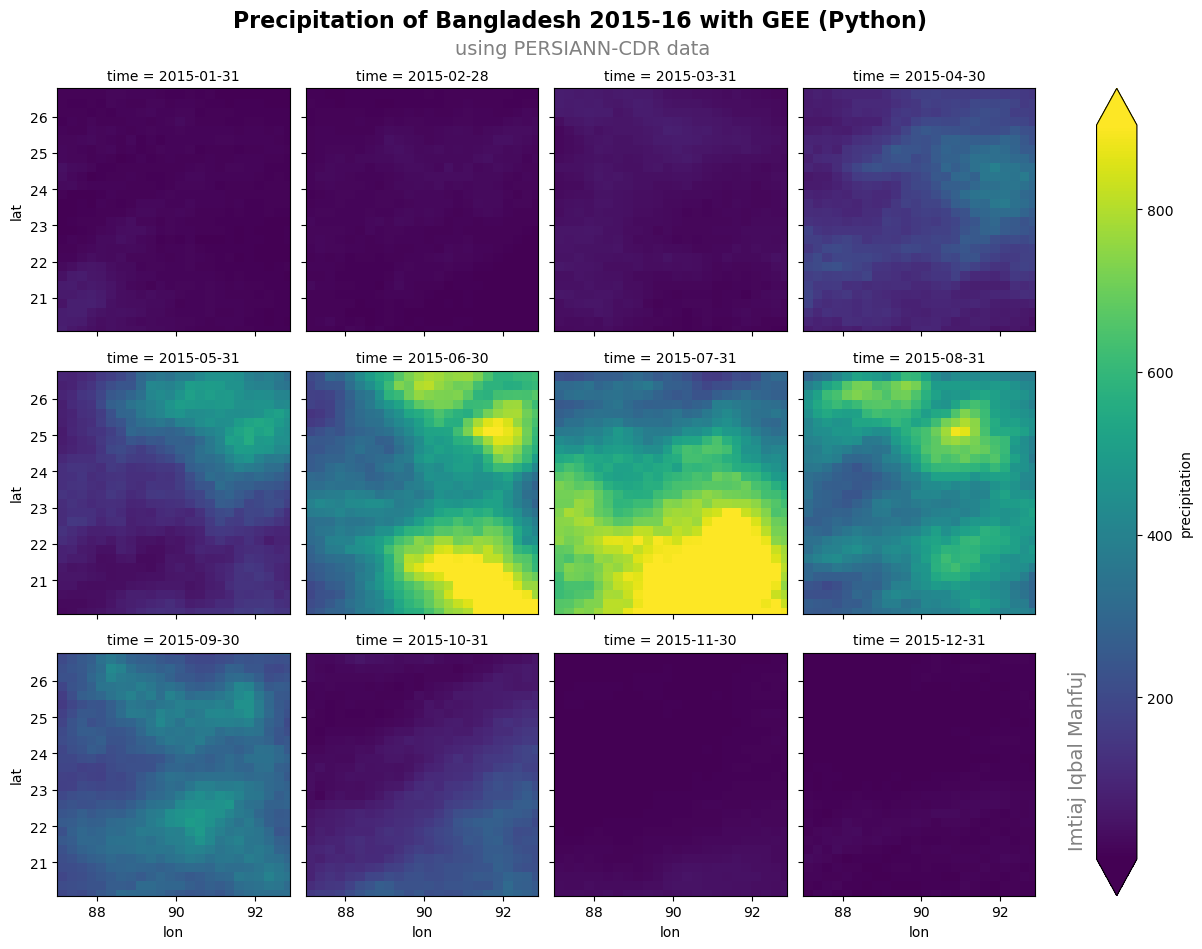

In [86]:
monthly.precipitation.plot(
    x = 'lon',
    y = 'lat',
    col = 'time',
    col_wrap = 4,
    robust = True
)
plt.suptitle("Precipitation of Bangladesh 2015-16 with GEE (Python)",
          x=.45, y=1.05, size=16, weight='bold')
plt.figtext(0.55, 1., 'using PERSIANN-CDR data', 
            horizontalalignment='right', 
            fontsize=14, 
            color='gray')
plt.figtext(0.84, .12, 'Imtiaj Iqbal Mahfuj', 
            horizontalalignment='right',
            rotation = 'vertical',
            fontsize=14, 
            color='gray')
plt.savefig('Precipitation of Bangladesh 2015-16 with GEE (Python)', dpi = 360, 
           bbox_inches = 'tight')

In [ ]:
pr2 = (
    ee.ImageCollection("NOAA/PERSIANN-CDR")
    .filterDate('2023','2024')
)

In [56]:
ds2 = xr.open_dataset(
    pr2,
    engine = 'ee',
    crs = 'EPSG:4326',
    scale = 0.05,
    geometry = roi
)

In [57]:
monthly2 = ds2.resample(time = 'M').sum('time')

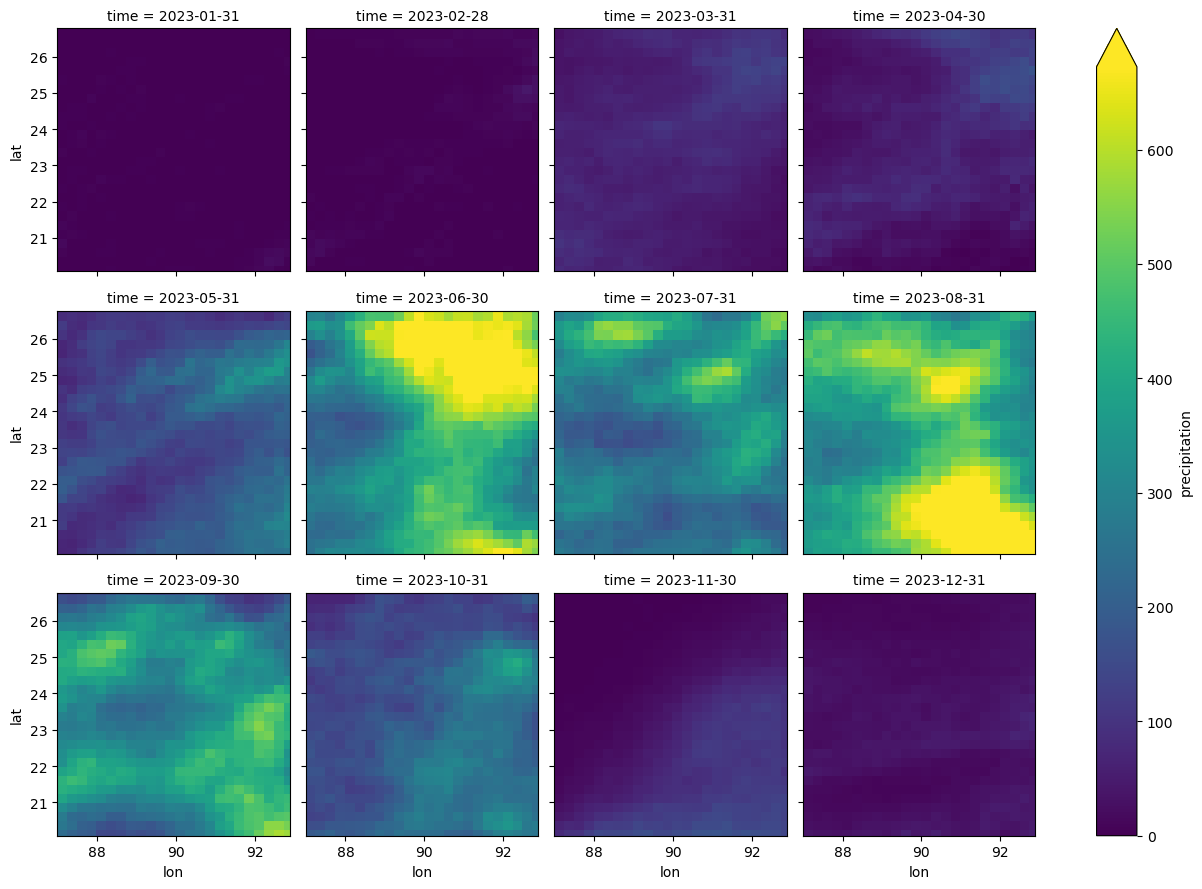

In [58]:
monthly2.precipitation.plot(
    x = 'lon',
    y = 'lat',
    col = 'time',
    col_wrap = 4,
    robust = True
)

In [59]:
import rioxarray

In [61]:
monthly = monthly.rio.write_crs('EPSG:4326', inplace = True)
monthly = monthly.rio.set_spatial_dims(x_dim = 'lon', y_dim = 'lat', inplace = True)
monthly.rio.write_coordinate_system(inplace = True)

<xarray.Dataset> Size: 761kB
Dimensions:        (time: 12, lon: 118, lat: 134)
Coordinates:
  * lon            (lon) float64 944B 87.01 87.06 87.11 ... 92.76 92.81 92.86
  * lat            (lat) float64 1kB 20.1 20.15 20.2 20.25 ... 26.65 26.7 26.75
  * time           (time) datetime64[ns] 96B 2015-01-31 ... 2015-12-31
    spatial_ref    int64 8B 0
Data variables:
    precipitation  (time, lon, lat) float32 759kB 76.31 76.31 ... 7.592 11.11
Attributes: (12/19)
    date_range:               [410227200000, 1625011200000]
    description:              <p>PERSIANN-CDR is a daily quasi-global precipi...
    keywords:                 ['cdr', 'climate', 'geophysical', 'ncdc', 'noaa...
    period:                   1
    period_mapping:           [410227200000, 1625011200000]
    product_tags:             ['precipitation', 'persiann', 'geophysical', 'w...
    ...                       ...
    type_name:                ImageCollection
    visualization_0_bands:    precipitation
    visualization_0_max:      50.0
    visualization_0_min:      0.0
    visualization_0_name:     Precipitation
    visualization_0_palette:  3907ff,03fff3,28ff25,fbff09,ff1105

In [62]:
import netCDF4

In [63]:
monthly.to_netcdf('precipitation')

---

## 📊 Results & Insights
- 🌧️ **Highest Precipitation:** Observed over **Sylhet and southeastern coastal regions**.
- ☁️ **Moderate Rainfall:** Central and southwestern districts.
- 🌤️ **Lowest Rainfall:** Northwest and western parts of Bangladesh.
- 🔹 The visualization confirms **strong monsoonal influence** and **orographic effects** in northeastern regions.

---

## ❓ Why this Project?
- Bangladesh is among the most **climate-vulnerable** nations globally.
- Rainfall variability plays a direct role in **flooding, drought, and agricultural productivity**.
- This analysis helps **researchers and policymakers** identify **rainfall patterns and anomalies**, contributing to **disaster resilience planning**.

---

## ✨ Features
- ✅ Full GEE-Python workflow for precipitation mapping.  
- 🌍 Uses open-source, long-term climate data (PERSIANN-CDR).  
- 🗺️ Exportable, publication-quality maps.  
- 💡 Easy reproducibility for temporal or regional modifications.  

---

## 📎 Links
- 🔗 [Project Website / Portfolio](https://imtiajiqbalmahfuj.github.io/)
- 🔗 [Dataset: PERSIANN-CDR (NOAA CDR)](https://developers.google.com/earth-engine/datasets/catalog/NOAA_CDR_PERSIANN_CDR)
- 💻 [Google Earth Engine Python API Docs](https://developers.google.com/earth-engine/python_install)

---

## 🔖 Tags
`GIS` `Remote Sensing` `Python` `Google Earth Engine` `Climate Data` `PERSIANN-CDR` `Precipitation` `Hydrology` `Spatial Analysis` `Bangladesh`

---

## 📌 Credits & Shoutouts
- 👨‍💻 **Author:** [Imtiaj Iqbal Mahfuj](https://imtiajiqbalmahfuj.github.io/)  
- 🙌 **Inspiration:** Special thanks to *Amirhossein Ahrari* for inspiration.  
- 🗂️ **Data Source:** [NOAA Climate Data Record – PERSIANN-CDR](https://data.noaa.gov/dataset/dataset/cdr-precipitation-persiann-cdr)  

---